## Libreria

In [24]:
import mglearn
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import make_scorer, r2_score, mean_squared_error
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV

##  Cargar los Datos

In [23]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Manual

In [52]:
param_grid = {
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {}
    },
    'Ridge': {
        'model': Ridge(),
        'params': {
            'alpha': [0.1, 1, 10, 100]
        }
    },
    'Lasso': {
        'model': Lasso(),
        'params': {
            'alpha': [0.1, 1, 10, 100]
        }
    }
}

def customPipeline(X_train, X_test, y_train, y_test):
    results = []
    best_score = -float('inf')
    best_estimator = None

    for model_name, model_info in param_grid.items():
        model = model_info['model']
        params = model_info['params']
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        model_instance = model
        best_model, best_score, best_params = None, -float('inf'), None

        for param in params.get('alpha', [None]):
            if 'alpha' in params:
                model_instance.set_params(alpha=param)
            model_instance.fit(X_train_scaled, y_train)
            y_pred = model_instance.predict(X_test_scaled)

            r2 = r2_score(y_test, y_pred)
            rmse = mean_squared_error(y_test, y_pred, squared=False)

            if r2 > best_score:
                best_score = r2
                best_model = model_instance
                best_params = {'alpha': param}

        results.append({
            'Model': model_name,
            'Best R2 Score': best_score,
            'Best RMSE': rmse,
            'Best Parameters': best_params
        })

    for result in results:
        print(f"Model: {result['Model']}, Best R2 Score: {result['Best R2 Score']}, Best RMSE: {result['Best RMSE']}, Best Parameters: {result['Best Parameters']}")

    print(f'\nMejor Modelo Global: {best_model}, Mejor Puntuación Global (R2): {best_score}')

customPipeline(X_train, X_test, y_train, y_test)


Model: LinearRegression, Best R2 Score: 0.7758378393351728, Best RMSE: 3.9619989685424297, Best Parameters: {'alpha': None}
Model: Ridge, Best R2 Score: 0.8260226962323864, Best RMSE: 3.853747259409729, Best Parameters: {'alpha': 10}
Model: Lasso, Best R2 Score: 0.8044305040053329, Best RMSE: 8.500633082280295, Best Parameters: {'alpha': 0.1}

Mejor Modelo Global: Lasso(alpha=100), Mejor Puntuación Global (R2): 0.8044305040053329


c:\Users\mcast\miniconda3\envs\ml_venv\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\mcast\miniconda3\envs\ml_venv\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\mcast\miniconda3\envs\ml_venv\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\mcast\miniconda3\envs\ml_venv\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in

## Resumen del Rendimiento de los Modelos

### Regresión Lineal
    - Indica que aproximadamente el 77.58% de la variabilidad de los datos es explicada por el modelo.
    - El error promedio de las predicciones es de 3.962 unidades.

### Regresión Ridge (Ridge)
    - Una mayor proporción de la variabilidad (82.60%) es explicada por este modelo en comparación con la regresión lineal simple.
    - Las predicciones son, en promedio, 3.854 más cercanas a los valores reales que las del modelo de regresión lineal simple.
    - El grado 10 de regularización, proporciona el mejor rendimiento.

### Regresión Lasso (Lasso)
    - Alrededor del 80.44% de la variabilidad es explicada por el modelo.
    - 8.501 de RME, Significativamente más alto que los otros modelos, lo que puede sugerir una especificación incorrecta del modelo o un problema con los datos.
    - El valor alpha de 0.1, proporcionó el mejor rendimiento para este modelo.

En conclusión, el **modelo de Regresión Ridge** parece ofrecer el mejor equilibrio entre capacidad predictiva y precisión, según lo indicado por el R² y el RMSE.

## Gráficas

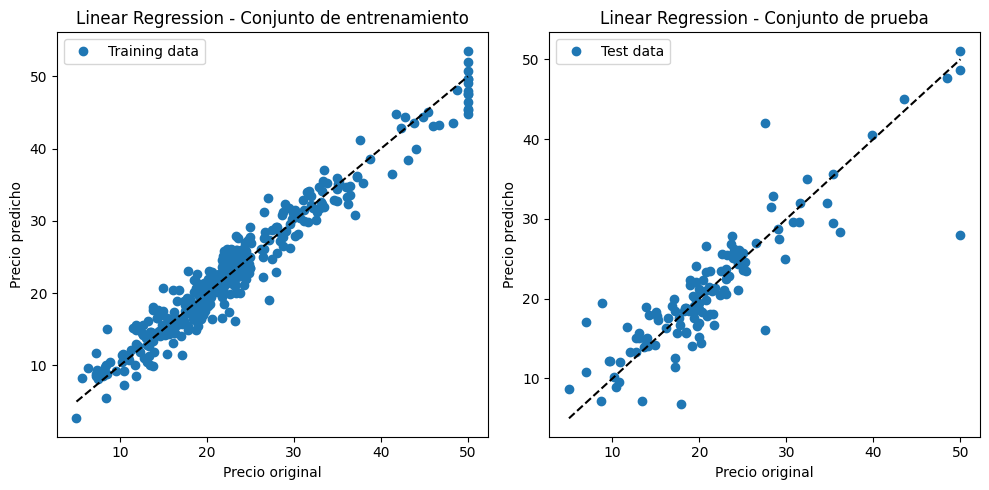

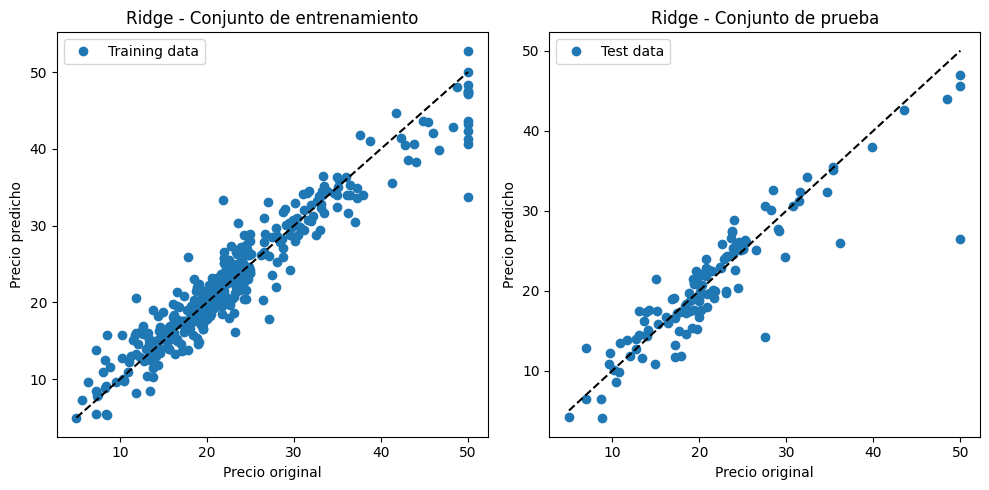

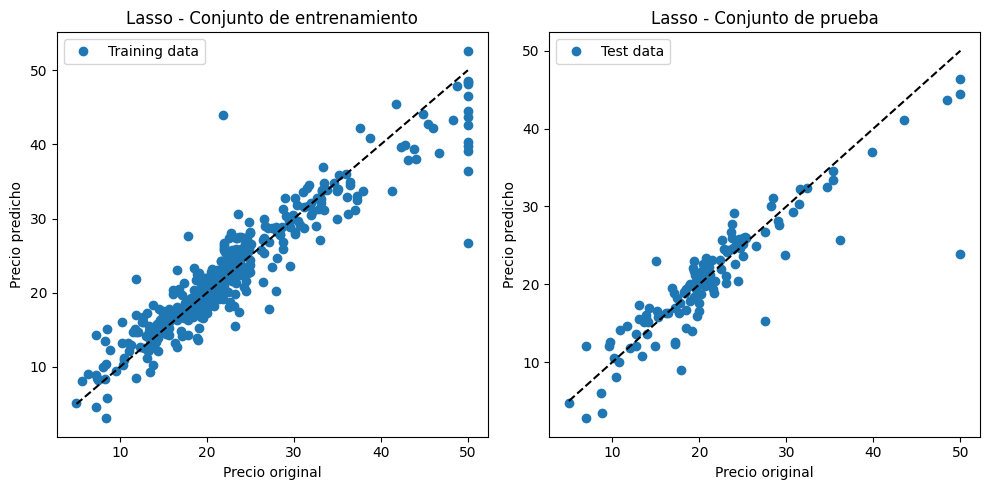

In [45]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=10),
    'Lasso': Lasso(alpha=0.1)
}

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)

    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(y_train, y_train_pred, 'o', label='Training data')
    plt.xlabel('Precio original')
    plt.ylabel('Precio predicho')
    plt.title(f'{model_name} - Conjunto de entrenamiento')
    plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], '--', color='black')  # Línea punteada
    
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(y_test, y_test_pred, 'o', label='Test data')
    plt.xlabel('Precio original')
    plt.ylabel('Precio predicho')
    plt.title(f'{model_name} - Conjunto de prueba')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='black')  # Línea punteada
    plt.legend()
    
    plt.tight_layout()
    plt.show()


La estrecha agrupación de puntos alrededor de la líneas de tendencia en los gráficos indica una buena capacidad predictiva del los diferentes modelos, con predicciones cercanas a los valores reales en la mayoría de las observaciones. La similitud en los patrones de dispersión entre los conjuntos de entrenamiento y prueba sugiere una generalización efectiva del modelo a nuevos datos, sin signos notables de sobreajuste o subajuste. Además, el modelo muestra consistencia en su rendimiento a lo largo de todo el rango de valores de "Precio original", lo que indica una relación lineal adecuada.

In [38]:

XTrain, XTest, yTrain, yTest = train_test_split(X, y, random_state=42)

pipelines = {
    'linear_regression': Pipeline([
        ('scaler', StandardScaler()),
        ('linear_regression', LinearRegression())
    ]),
    'ridge': Pipeline([
        ('scaler', StandardScaler()),
        ('ridge', Ridge())
    ]),
    'lasso': Pipeline([
        ('scaler', StandardScaler()),
        ('lasso', Lasso())
    ])
}

param_grid = {
    'linear_regression': {},
    'ridge': {'ridge__alpha': [0.01, 0.1, 1, 10]},
    'lasso': {'lasso__alpha': [0.01, 0.1, 1, 10]}
}


def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def evaluate_models():
    for model_name in pipelines:
        grid_search = GridSearchCV(pipelines[model_name], param_grid[model_name], cv=KFold(n_splits=5), scoring='r2', verbose=1)
        grid_search.fit(XTrain, yTrain)

        best_model = grid_search.best_estimator_
        yPred = best_model.predict(XTest)
        r2 = r2_score(yTest, yPred)
        rmse = calculate_rmse(yTest, yPred)
        
        print(f"Model: {model_name}, Best parameters: {grid_search.best_params_}, Best R2 Score: {grid_search.best_score_}")
        print(f"RMSE on test set: {rmse}")
        print()

evaluate_models()


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Model: linear_regression, Best parameters: {}, Best R2 Score: 0.7993600288044855
RMSE on test set: 3.9619989685424297

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Model: ridge, Best parameters: {'ridge__alpha': 1}, Best R2 Score: 0.8580279017580533
RMSE on test set: 3.5848645203460565

Fitting 5 folds for each of 4 candidates, totalling 20 fits


c:\Users\mcast\miniconda3\envs\ml_venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.406e+02, tolerance: 2.704e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\mcast\miniconda3\envs\ml_venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.565e+02, tolerance: 2.670e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\mcast\miniconda3\envs\ml_venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regula

Model: lasso, Best parameters: {'lasso__alpha': 0.01}, Best R2 Score: 0.857284628341563
RMSE on test set: 3.5995862732551185



c:\Users\mcast\miniconda3\envs\ml_venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.082e+02, tolerance: 3.361e+00
  model = cd_fast.enet_coordinate_descent(


# Resumen del Rendimiento de los Modelos

## Regresión Lineal
    - Indica que aproximadamente el 79.93% de la variabilidad de los datos es explicada por el modelo.
    - El error promedio de las predicciones es de 3.96 unidades.

## Regresión Ridge (Ridge)
    - Una mayor proporción de la variabilidad (85.8%) es explicada por este modelo en comparación con la regresión lineal simple.
    - Las predicciones son, en promedio, 3.58 más cercanas a los valores reales que las del modelo de regresión lineal simple.
    - El grado 1 de regularización, proporciona el mejor rendimiento.

## Regresión Lasso (Lasso)
    - Alrededor del 85.72% de la variabilidad es explicada por el modelo.
    - 3.59 de RME
    - El valor alpha de 0.01, proporcionó el mejor rendimiento para este modelo.

En conclusión, tanto la regresión Ridge como la Lasso son preferibles sobre la regresión lineal simple para este conjunto de datos. 


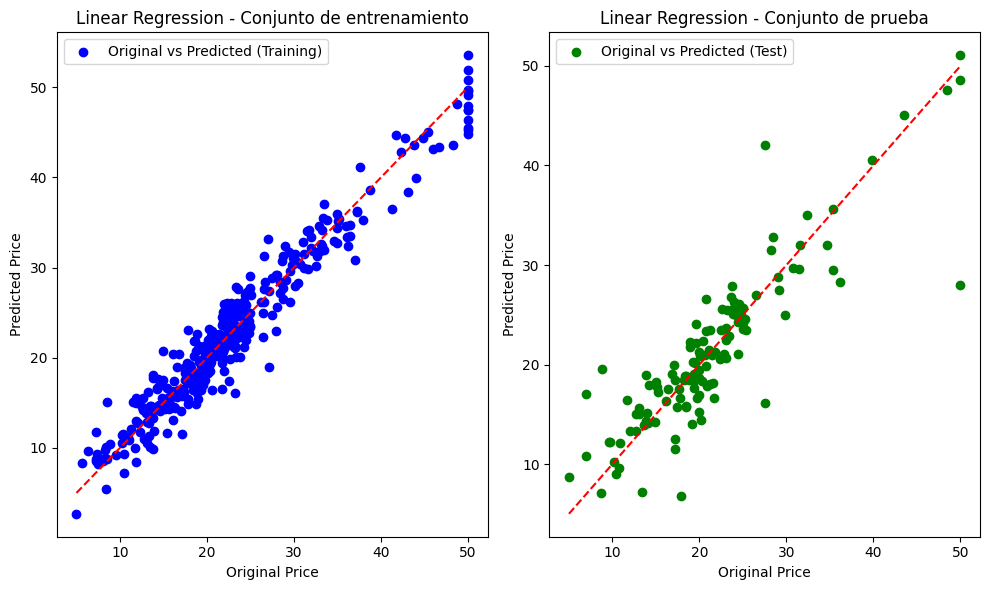

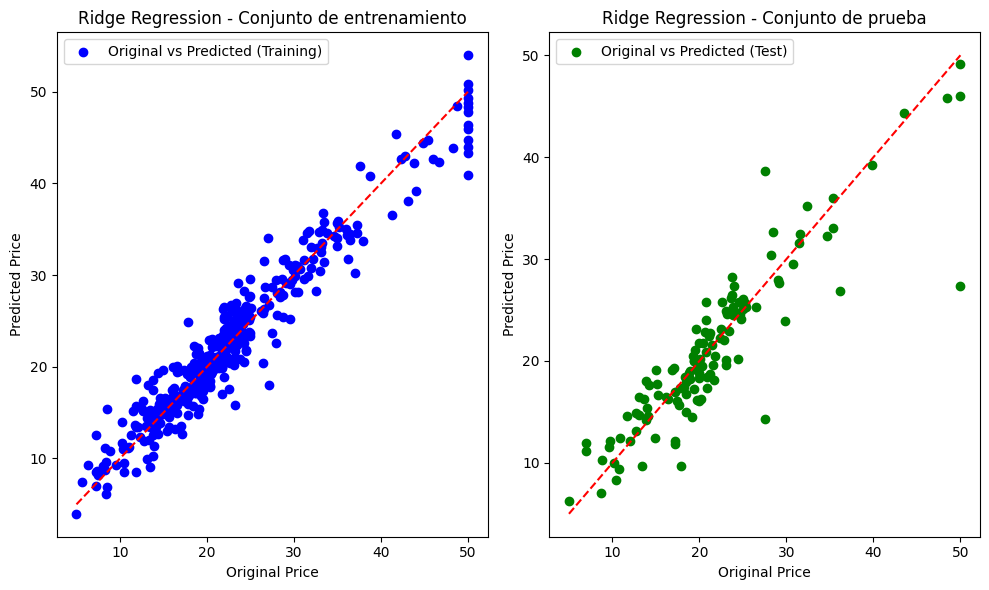

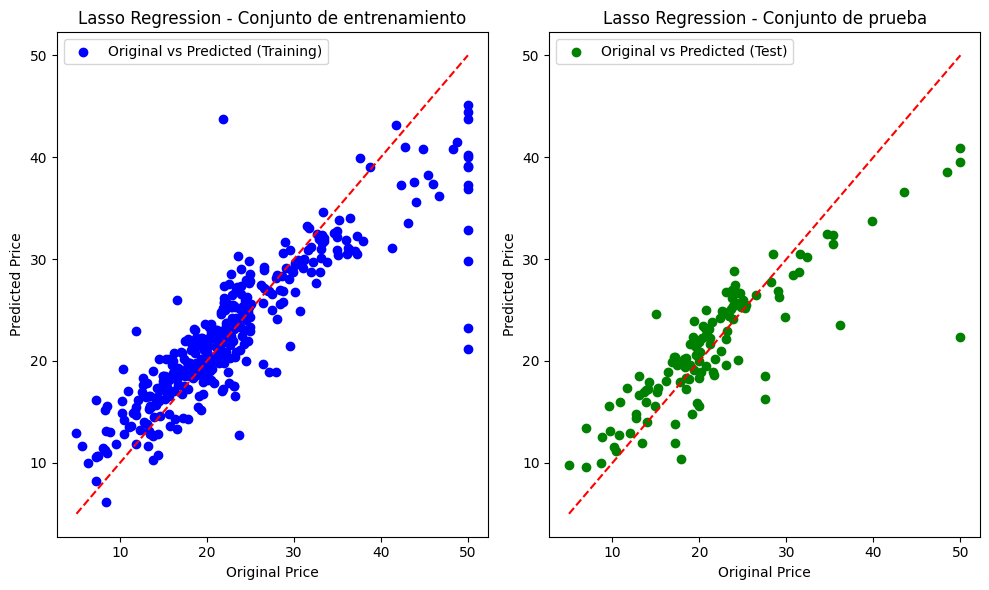

In [57]:
def plot_prices(y_true_train, y_pred_train, y_true_test, y_pred_test, model_name):
    plt.figure(figsize=(10, 6))
    
    plt.subplot(1, 2, 1)
    plt.scatter(y_true_train, y_pred_train, color='blue', label='Original vs Predicted (Training)')
    plt.plot([min(y_true_train), max(y_true_train)], [min(y_true_train), max(y_true_train)], color='red', linestyle='--')
    plt.xlabel('Original Price')
    plt.ylabel('Predicted Price')
    plt.title(f'{model_name} - Conjunto de entrenamiento')
    plt.legend()
   
    plt.subplot(1, 2, 2)
    plt.scatter(y_true_test, y_pred_test, color='green', label='Original vs Predicted (Test)')
    plt.plot([min(y_true_test), max(y_true_test)], [min(y_true_test), max(y_true_test)], color='red', linestyle='--')
    plt.xlabel('Original Price')
    plt.ylabel('Predicted Price')
    plt.title(f'{model_name} - Conjunto de prueba')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

linear_regression = pipelines['linear_regression']
yTrain_lr, y_pred_train_lr, yTest_lr, y_pred_test_lr = get_prices(linear_regression)

ridge = pipelines['ridge']
yTrain_ridge, y_pred_train_ridge, yTest_ridge, y_pred_test_ridge = get_prices(ridge)

lasso = pipelines['lasso']
yTrain_lasso, y_pred_train_lasso, yTest_lasso, y_pred_test_lasso = get_prices(lasso)

plot_prices(yTrain_lr, y_pred_train_lr, yTest_lr, y_pred_test_lr, 'Linear Regression')
plot_prices(yTrain_ridge, y_pred_train_ridge, yTest_ridge, y_pred_test_ridge, 'Ridge Regression')
plot_prices(yTrain_lasso, y_pred_train_lasso, yTest_lasso, y_pred_test_lasso, 'Lasso Regression')


Al igual que los resultados anteriores, estos gráficos visualizan de manera muy similar a los obtenidos por el procedimiento manual.

### Podemos apreciar que en ambos métodos, tanto en (i) como en (ii), se obtuvieron resultados similares tanto en parámetros como en puntuaciones. Además, se puede concluir que el modelo que mejor se ajusta a los datos de Boston Housing es el de Ridge, ya que en ambos casos tuvo los mejores resultados.